### khái niệm
    - Historgram của ảnh là lược đồ xám chỉ ra phân bố mức xám trên ảnh
### nhận xét 
    - ảnh tối biểu đồ histogram phân bố về phía trái
    - ảnh sáng biểu đồ histgram phân bố về phía phải 
    - ảnh độ tương phản thấp histogram phân bố không đều
    - ảnh độ tương phản cao histogram phân bố đều

### giải thích code : 
    - img[y, x, 0], img[y, x, 1], img[y, x, 2]:
    Lấy giá trị kênh màu Red (0), Green (1), Blue (2) tại pixel vị trí (y, x) trong ảnh.
    Nếu ảnh là kiểu float (giá trị từ 0 đến 1), nhân với 255 để chuyển về thang 0-255 (chuẩn của ảnh số nguyên 8 bit).
    Dùng int(...) để ép kiểu về số nguyên, phù hợp với chỉ số của mảng histogram.

Bởi vì histogram màu được tính theo mức giá trị nguyên trong khoảng 0–255, tương ứng với 256 mức màu cho mỗi kênh R, G, B.

Khi ảnh ở dạng float, ví dụ pixel có giá trị 0.5, thì đó thực chất là mức màu 128 nếu quy về thang 0–255.

[[[0.63529414 0.5372549  0.49803922 1.        ]
  [0.6313726  0.5372549  0.49411765 1.        ]
  [0.6313726  0.5372549  0.49019608 1.        ]
  ...
  [0.56078434 0.47843137 0.41960785 1.        ]
  [0.6156863  0.53333336 0.46666667 1.        ]
  [0.64705884 0.5568628  0.4862745  1.        ]]

 [[0.87058824 0.6039216  0.4862745  1.        ]
  [0.8666667  0.6        0.47843137 1.        ]
  [0.8627451  0.59607846 0.46666667 1.        ]
  ...
  [0.6784314  0.44705883 0.2901961  1.        ]
  [0.8117647  0.5803922  0.40392157 1.        ]
  [0.8862745  0.63529414 0.4509804  1.        ]]

 [[0.8784314  0.6        0.4745098  1.        ]
  [0.8745098  0.59607846 0.47058824 1.        ]
  [0.87058824 0.59607846 0.4627451  1.        ]
  ...
  [0.6901961  0.43137255 0.29411766 1.        ]
  [0.83137256 0.5764706  0.42352942 1.        ]
  [0.91764706 0.65882355 0.49411765 1.        ]]

 ...

 [[0.15294118 0.11764706 0.08235294 1.        ]
  [0.18039216 0.14901961 0.09411765 1.        ]
  [0.15294

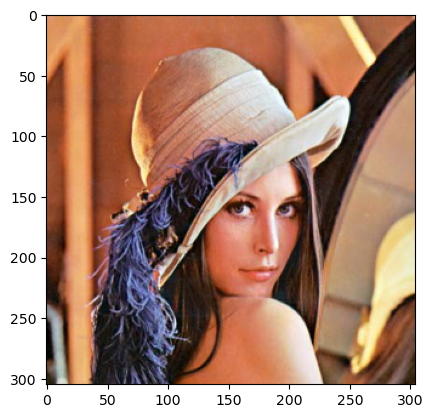

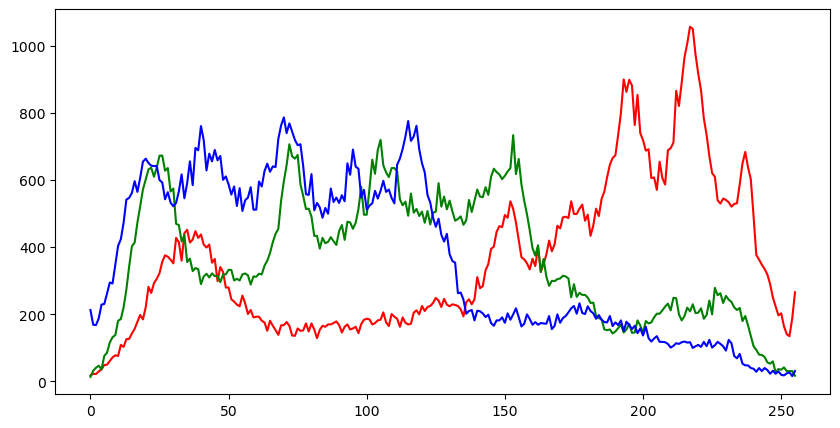

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img = plt.imread('D:/SUM25/CPV/code_in_class/images/Lady.png')

plt.imshow(img)

def tinhHistogram(img):
    histR = np.zeros(256, dtype=int)
    histG = np.zeros(256, dtype=int)
    histB = np.zeros(256, dtype=int)

    h, w, _ = img.shape
    print(img)
    for y in range(h):
        for x in range(w):
            # Lấy giá trị từng kênh tại pixel (y, x)
            if img.dtype == np.float32 or img.dtype == np.float64:
                r = int(img[y, x, 0] * 255)
                g = int(img[y, x, 1] * 255)
                b = int(img[y, x, 2] * 255)
            else:
                r = int(img[y, x, 0])
                g = int(img[y, x, 1])
                b = int(img[y, x, 2])
            histR[r] += 1
            histG[g] += 1
            histB[b] += 1
    return histR, histG, histB

a, b, c = tinhHistogram(img)
plt.figure(figsize=(10, 5)) 
plt.plot(a, color='red', label='Red Channel')
plt.plot(b, color='green', label='Green Channel')
plt.plot(c, color='blue', label='Blue Channel')
plt.show()

### Cơ sở lọc trong miền không gian :
    - sử dụng mặt nạ lọc thường được gọi là kernel , filter , mask 
    - là ma trận vuông có kích thước 3x3 4x4 , ...
    - mặt nạ lọc di chuyển trên ảnh và thao tác lân cận với các điểm ảnh
    - các thao tác lân cận cơ bản là : min , max , trung bình , trung vị ,gaussian ,..
    

### tích chập 
- hiểu đơn giản là nhân từng phần tử của hai ma trận lại với nhau rồi cộng tổng
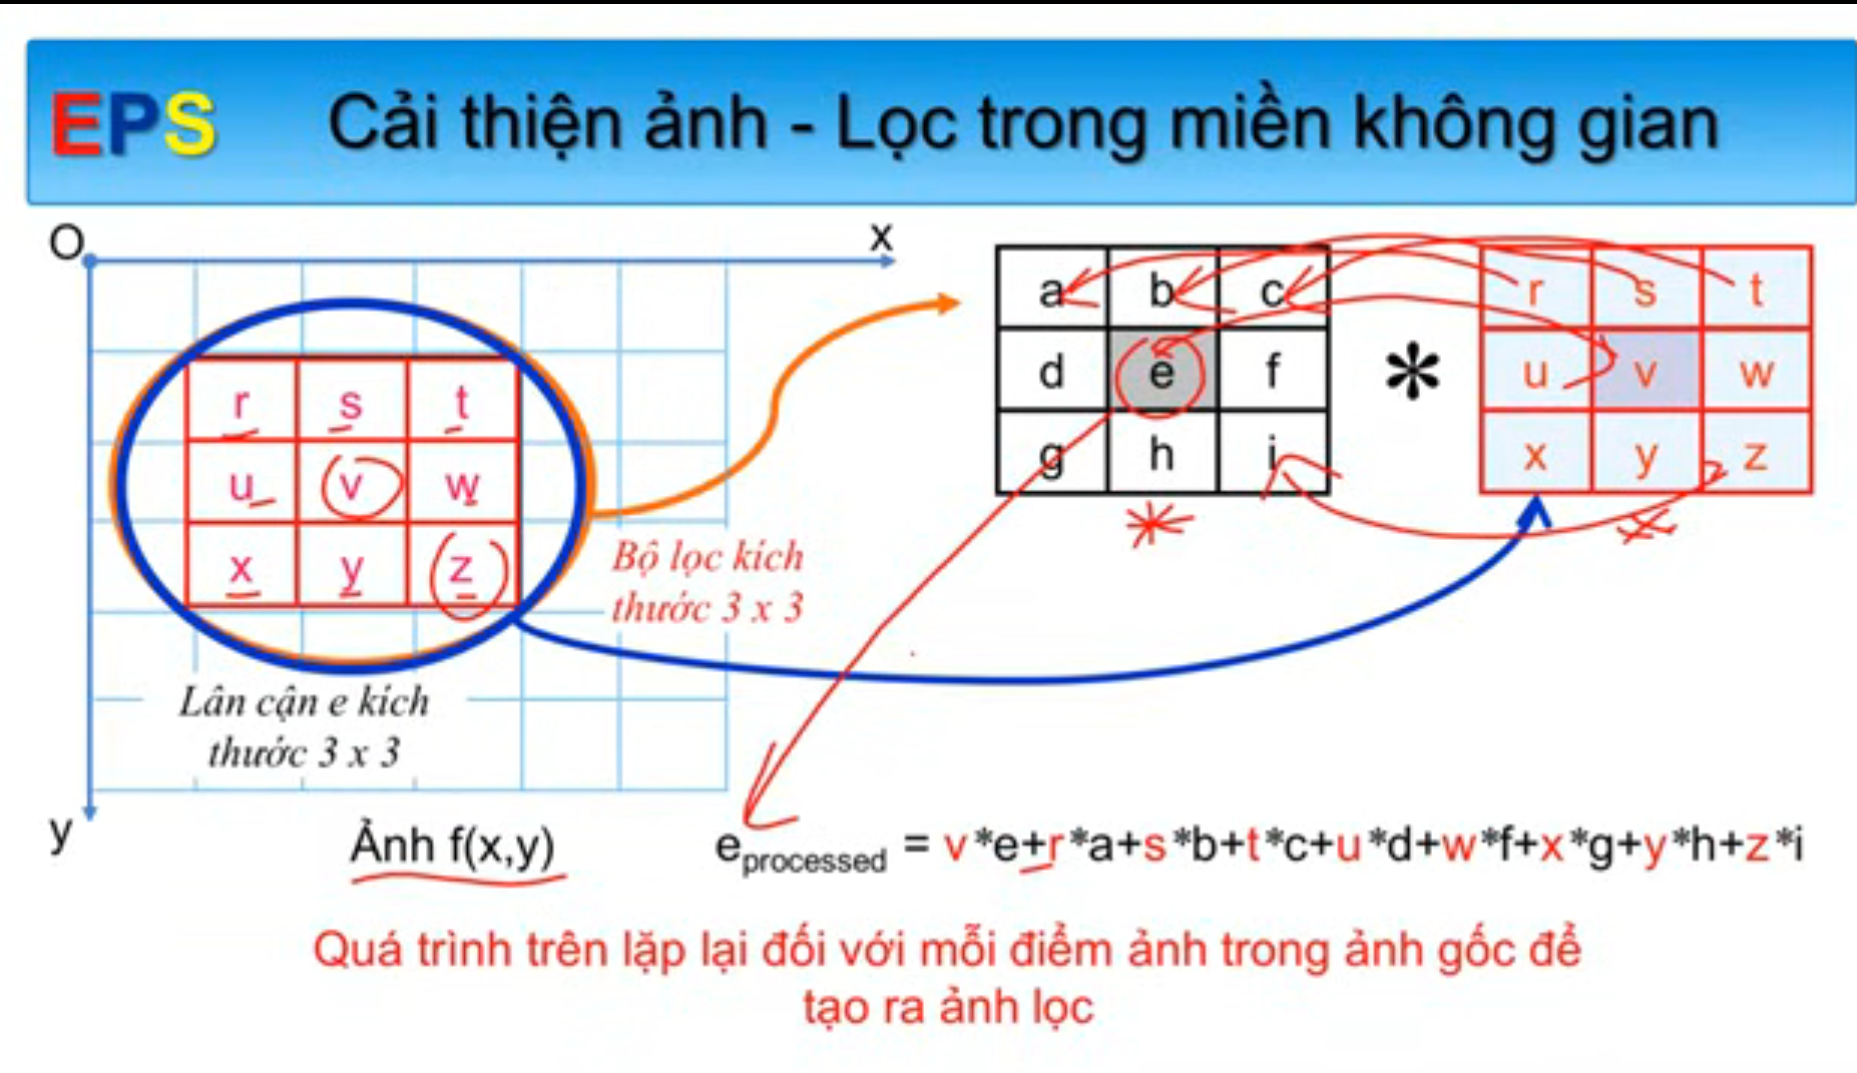 
- ma trận a,b,c,d là ma trận ảnh gốc , ma trận r,s,t,u,v là ma trận bộ lọc khi nhân hai ma trận với nhau ta được ảnh đã được lọc

### bộ lọc trung bình  :
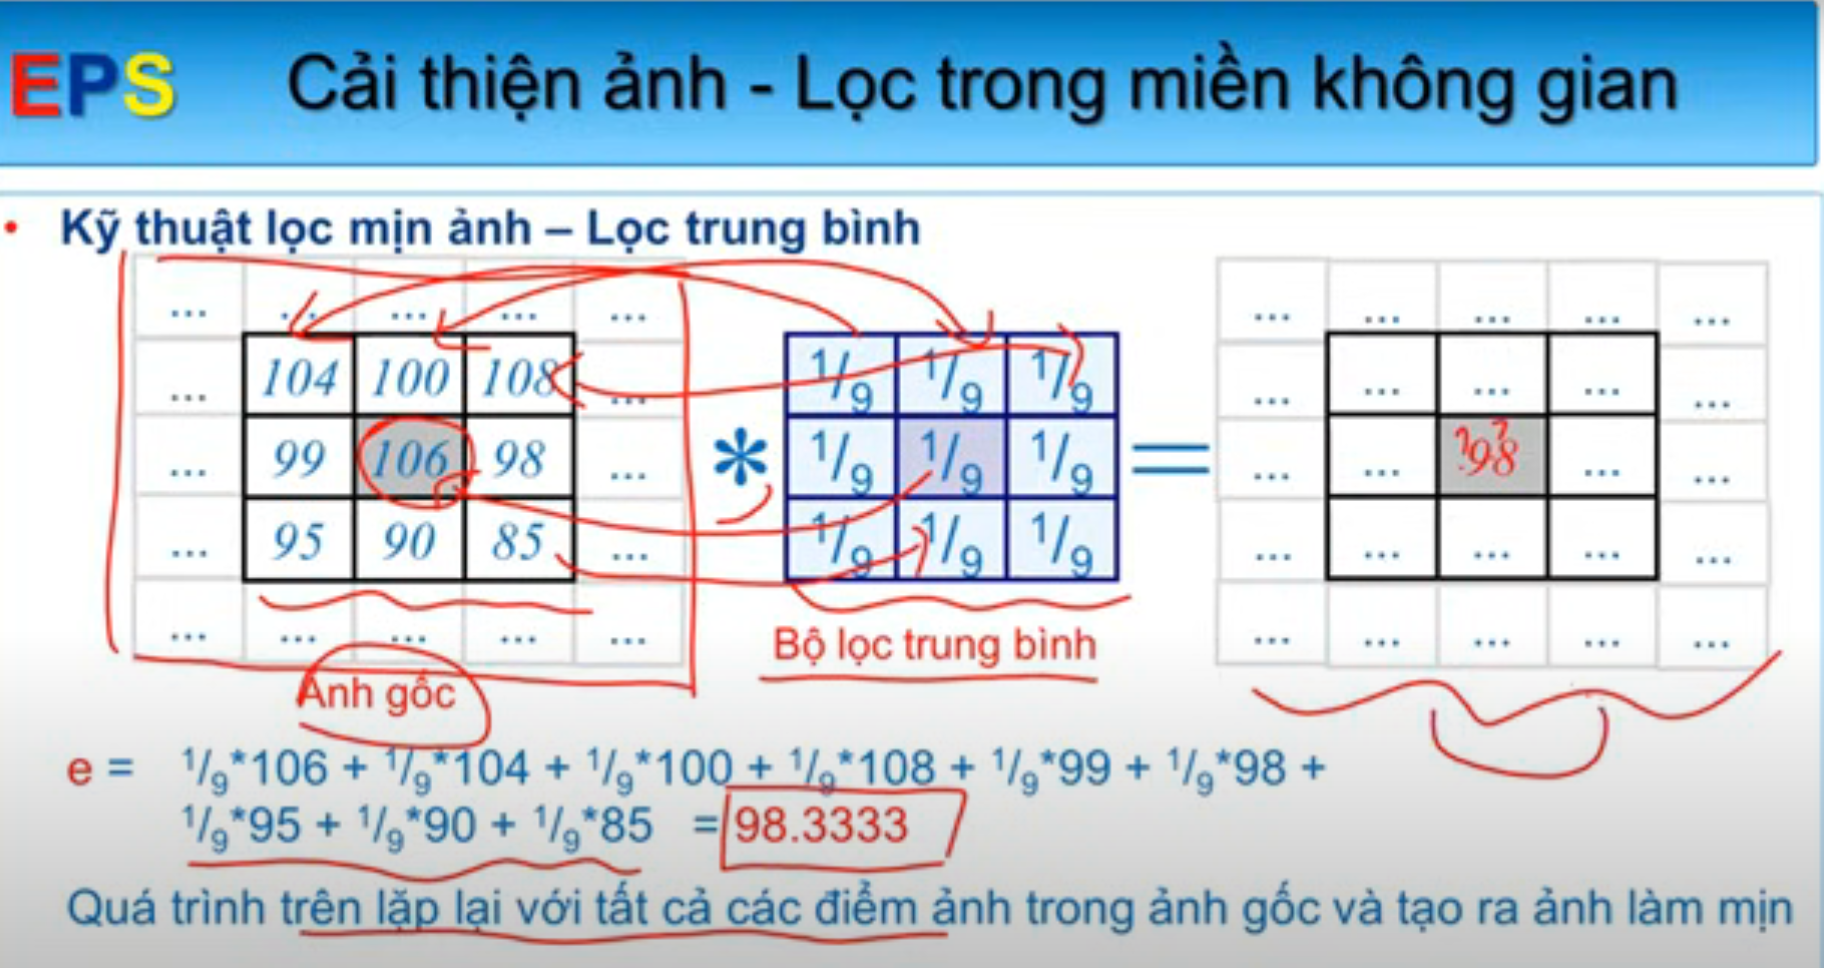